## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  92.551979   464.647676  0.181236   5.089835   125.153293
1   0.690497  1711.531085  0.860966   7.209049  1473.504215
2  21.151438  1687.472813  0.174963   7.563043   295.972664
3  31.118442  1465.442683  0.117826   2.218117   175.403582
4  68.889486  1259.399664  0.634834  10.077859   802.577149


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0185026	total: 55.6ms	remaining: 55.6s
1:	learn: 1.0082422	total: 56.1ms	remaining: 28s
2:	learn: 0.9980643	total: 56.6ms	remaining: 18.8s
3:	learn: 0.9872087	total: 57ms	remaining: 14.2s
4:	learn: 0.9743623	total: 57.8ms	remaining: 11.5s
5:	learn: 0.9641939	total: 59ms	remaining: 9.77s
6:	learn: 0.9514230	total: 59.6ms	remaining: 8.45s
7:	learn: 0.9412375	total: 59.9ms	remaining: 7.43s
8:	learn: 0.9288277	total: 60.2ms	remaining: 6.63s
9:	learn: 0.9168843	total: 60.7ms	remaining: 6.01s
10:	learn: 0.9045258	total: 61.2ms	remaining: 5.5s
11:	learn: 0.8904866	total: 61.7ms	remaining: 5.08s
12:	learn: 0.8792599	total: 62.1ms	remaining: 4.71s
13:	learn: 0.8668313	total: 62.6ms	remaining: 4.41s
14:	learn: 0.8561500	total: 63ms	remaining: 4.13s
15:	learn: 0.8467201	total: 63.4ms	remaining: 3.9s
16:	learn: 0.8378930	total: 63.7ms	remaining: 3.68s
17:	learn: 0.8276501	total: 63.9ms	remaining: 3.49s
18:	learn: 0.8204856	total: 64.2ms	remaining: 3.31s
19

83:	learn: 0.3944568	total: 93.3ms	remaining: 1.02s
84:	learn: 0.3904160	total: 93.8ms	remaining: 1.01s
85:	learn: 0.3859777	total: 94.1ms	remaining: 1s
86:	learn: 0.3822180	total: 94.6ms	remaining: 993ms
87:	learn: 0.3789851	total: 95.2ms	remaining: 987ms
88:	learn: 0.3743115	total: 95.6ms	remaining: 979ms
89:	learn: 0.3709555	total: 96.1ms	remaining: 972ms
90:	learn: 0.3663912	total: 96.4ms	remaining: 963ms
91:	learn: 0.3629561	total: 96.9ms	remaining: 956ms
92:	learn: 0.3596554	total: 97.4ms	remaining: 950ms
93:	learn: 0.3552861	total: 97.9ms	remaining: 943ms
94:	learn: 0.3516365	total: 98.3ms	remaining: 937ms
95:	learn: 0.3475933	total: 98.7ms	remaining: 930ms
96:	learn: 0.3445434	total: 99.2ms	remaining: 924ms
97:	learn: 0.3408825	total: 99.6ms	remaining: 916ms
98:	learn: 0.3375415	total: 100ms	remaining: 910ms
99:	learn: 0.3344196	total: 100ms	remaining: 904ms
100:	learn: 0.3313335	total: 101ms	remaining: 898ms
101:	learn: 0.3282564	total: 101ms	remaining: 892ms
102:	learn: 0.324

279:	learn: 0.0678578	total: 184ms	remaining: 473ms
280:	learn: 0.0673800	total: 184ms	remaining: 472ms
281:	learn: 0.0668665	total: 185ms	remaining: 470ms
282:	learn: 0.0665026	total: 185ms	remaining: 469ms
283:	learn: 0.0660574	total: 185ms	remaining: 468ms
284:	learn: 0.0656526	total: 186ms	remaining: 466ms
285:	learn: 0.0652769	total: 186ms	remaining: 465ms
286:	learn: 0.0647582	total: 187ms	remaining: 464ms
287:	learn: 0.0644290	total: 187ms	remaining: 462ms
288:	learn: 0.0639953	total: 187ms	remaining: 461ms
289:	learn: 0.0635992	total: 189ms	remaining: 462ms
290:	learn: 0.0631296	total: 189ms	remaining: 460ms
291:	learn: 0.0626661	total: 189ms	remaining: 459ms
292:	learn: 0.0622307	total: 190ms	remaining: 458ms
293:	learn: 0.0617998	total: 190ms	remaining: 456ms
294:	learn: 0.0614483	total: 190ms	remaining: 455ms
295:	learn: 0.0610658	total: 191ms	remaining: 454ms
296:	learn: 0.0606359	total: 191ms	remaining: 453ms
297:	learn: 0.0602213	total: 192ms	remaining: 451ms
298:	learn: 

478:	learn: 0.0234927	total: 273ms	remaining: 297ms
479:	learn: 0.0233350	total: 274ms	remaining: 296ms
480:	learn: 0.0232720	total: 274ms	remaining: 296ms
481:	learn: 0.0231172	total: 275ms	remaining: 295ms
482:	learn: 0.0230557	total: 275ms	remaining: 295ms
483:	learn: 0.0229039	total: 276ms	remaining: 294ms
484:	learn: 0.0228001	total: 276ms	remaining: 293ms
485:	learn: 0.0227145	total: 277ms	remaining: 293ms
486:	learn: 0.0226031	total: 277ms	remaining: 292ms
487:	learn: 0.0224905	total: 278ms	remaining: 291ms
488:	learn: 0.0224320	total: 278ms	remaining: 290ms
489:	learn: 0.0223471	total: 278ms	remaining: 290ms
490:	learn: 0.0222389	total: 279ms	remaining: 289ms
491:	learn: 0.0221326	total: 279ms	remaining: 288ms
492:	learn: 0.0220525	total: 280ms	remaining: 288ms
493:	learn: 0.0219479	total: 280ms	remaining: 287ms
494:	learn: 0.0218698	total: 281ms	remaining: 286ms
495:	learn: 0.0217199	total: 281ms	remaining: 286ms
496:	learn: 0.0216190	total: 282ms	remaining: 285ms
497:	learn: 

673:	learn: 0.0109372	total: 362ms	remaining: 175ms
674:	learn: 0.0109251	total: 363ms	remaining: 175ms
675:	learn: 0.0109126	total: 364ms	remaining: 174ms
676:	learn: 0.0109008	total: 364ms	remaining: 174ms
677:	learn: 0.0108736	total: 364ms	remaining: 173ms
678:	learn: 0.0108619	total: 365ms	remaining: 173ms
679:	learn: 0.0108243	total: 365ms	remaining: 172ms
680:	learn: 0.0107810	total: 366ms	remaining: 171ms
681:	learn: 0.0107696	total: 366ms	remaining: 171ms
682:	learn: 0.0107459	total: 367ms	remaining: 170ms
683:	learn: 0.0107374	total: 367ms	remaining: 170ms
684:	learn: 0.0107289	total: 367ms	remaining: 169ms
685:	learn: 0.0106925	total: 368ms	remaining: 168ms
686:	learn: 0.0106768	total: 368ms	remaining: 168ms
687:	learn: 0.0106305	total: 369ms	remaining: 167ms
688:	learn: 0.0106224	total: 369ms	remaining: 167ms
689:	learn: 0.0105875	total: 370ms	remaining: 166ms
690:	learn: 0.0105694	total: 370ms	remaining: 166ms
691:	learn: 0.0105543	total: 371ms	remaining: 165ms
692:	learn: 

859:	learn: 0.0063605	total: 450ms	remaining: 73.2ms
860:	learn: 0.0063348	total: 450ms	remaining: 72.7ms
861:	learn: 0.0063144	total: 451ms	remaining: 72.2ms
862:	learn: 0.0063036	total: 451ms	remaining: 71.6ms
863:	learn: 0.0062896	total: 452ms	remaining: 71.1ms
864:	learn: 0.0062647	total: 452ms	remaining: 70.6ms
865:	learn: 0.0062416	total: 452ms	remaining: 70ms
866:	learn: 0.0062216	total: 453ms	remaining: 69.5ms
867:	learn: 0.0062078	total: 453ms	remaining: 68.9ms
868:	learn: 0.0061936	total: 454ms	remaining: 68.4ms
869:	learn: 0.0061604	total: 454ms	remaining: 67.9ms
870:	learn: 0.0061361	total: 455ms	remaining: 67.3ms
871:	learn: 0.0061138	total: 455ms	remaining: 66.8ms
872:	learn: 0.0060813	total: 456ms	remaining: 66.3ms
873:	learn: 0.0060496	total: 457ms	remaining: 65.9ms
874:	learn: 0.0060186	total: 457ms	remaining: 65.3ms
875:	learn: 0.0059950	total: 458ms	remaining: 64.8ms
876:	learn: 0.0059722	total: 458ms	remaining: 64.3ms
877:	learn: 0.0059592	total: 459ms	remaining: 63

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

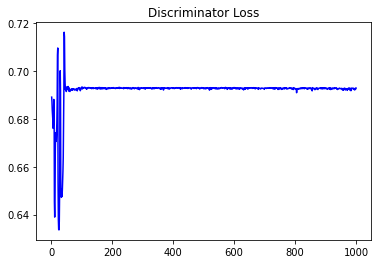

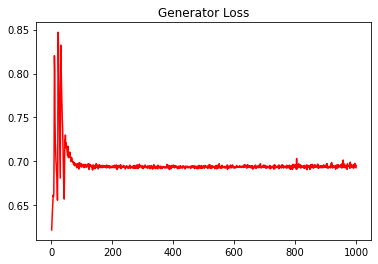

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011100711712169723


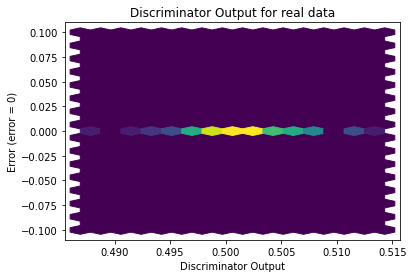

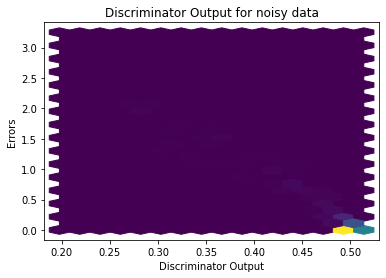

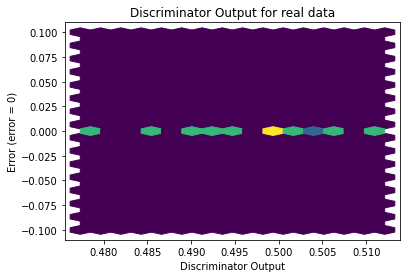

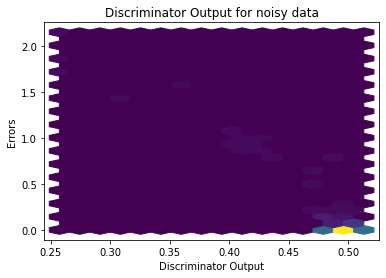

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


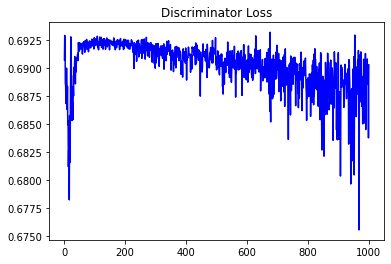

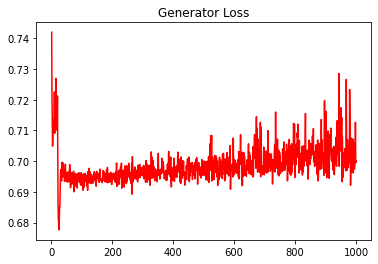

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0071385234606780226


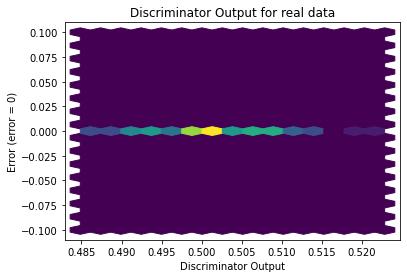

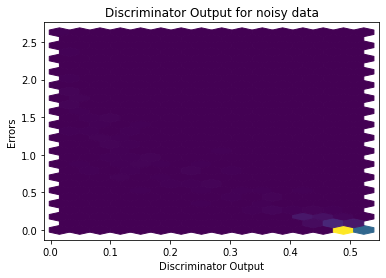

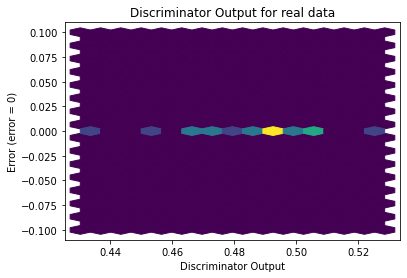

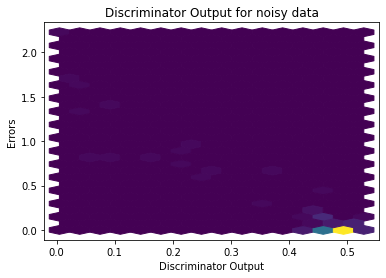

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1002]], requires_grad=True)
